In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [ ]:
# Loading FED API key
api_key = '2a237e524fd776d34a46cb45409b5c55'

In [ ]:
# Interact with the API

class FredPy:

    def __init__(self, token = None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations?series_id={seriesID}&api_key={key}&file_type=json&observation_start={start}&observation_end={end}&units={units}&frequency={frequency}"
      
    def set_token(self, token):
        self.token = token

    def get_series(self):
        self.token = token 
    
    def get_series(self, seriesID, start, end, units, frequency):
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token, frequency=frequency
        )

        response = requests.get(url_formatted)
    
        return response


        

In [ ]:
# User Input as parameters for request
fredpy = FredPy()
fredpy.set_token(api_key)

seriesIDs = input('seriesID: ')
start = input('start date: ')
year_start = start[0:3]
end = input('end date: ')
year_end = end[0:3]
units = input('units: ')
frequency = input('frequency: ')

if (len(start) == 4):
    start =  start + '-01-01'
if (len(end) == 4):
    end = end + '-12-31'

data = fredpy.get_series(
    seriesID = seriesIDs,
    start = start,
    end = end,
    units = units,
    frequency = frequency
)




seriesID: UNRATE
start date: 2000
end date: 2022
units: 
frequency: 


In [ ]:
# Assigning data from data frame to correct date type incase of further analysis
# as well as renaming collumns to corresponding titles
import itertools
from itertools import cycle

name = seriesIDs
if (frequency == 'q'):
    df = pd.DataFrame(data.json()['observations'])[['date','value']]\
        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
        .assign(value = lambda cols: cols['value'].astype(float))\
        .rename(columns = {'value': 'GDP'})

    #adding frequency of data
    num_cycle = itertools.cycle(['I', 'II', 'III', 'IV'])
    value = [next(num_cycle) for num in range(len(df))]
    df.insert(0,'quarter',value)


else:
    df = pd.DataFrame(data.json()['observations'])[['date','value']]\
        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
        .assign(value = lambda cols: cols['value'].astype(float))\
        .rename(columns = {'value': name})

df



,date,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
269,2022-06-01,3.6
270,2022-07-01,3.5
271,2022-08-01,3.7
272,2022-09-01,3.5


In [ ]:
date = pd.DataFrame(data.json()['observations'])['date']
end_date = date.iloc[-1]

if (end == ''):
    end = date.iloc[-1]

if( end_date != end):
    print('data not found, end date is this ' + end_date +  '\ndate inputed was: ' + end)

else:
    print ('date lined up')


    

data not found, end date is this 2022-10-01
date inputed was: 2022-12-31


In [ ]:
# Unemployment rate 
unemployment_data = fredpy.get_series(
    seriesID = 'UNRATE',
    start = start,
    end = end,
    units = 'lin',
    frequency = 'q'
)
#unrate = pd.DataFrame(unemployment_data.json()['observations'])[['date', 'value']]
#unemployment_data.json()['observations']

unemployment_data.json()

#unrate = pd.DataFrame(unemployment_data.json()['observations'])[['date','value']]\
#    .assign(date = lambda cols: pd.to_datetime(cols['date']))\
#    .assign(value = lambda cols: cols['value'].astype(float))\
#    .rename(columns = {'value': 'UNRATE'})

#unrate

In [ ]:
fredpy = FredPy()
fredpy.set_token(api_key)

seriesID2 = input('seriesID: ')
start = input('start date: ')
year_start = start[0:4]
end = input('end date: ')
year_end = end[0:4]
units = input('units: ')
frequency = input('frequency: ')

if (len(start) == 4):
    start =  start + '-01-01'
if (len(end) == 4):
    end = end + '-12-31'

data2 = fredpy.get_series(
    seriesID = seriesID2,
    start = start,
    end = end,
    units = units,
    frequency = frequency
)



import itertools
from itertools import cycle


if (frequency == 'q'):
    df2 = pd.DataFrame(data2.json()['observations'])[['date','value']]\
        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
        .assign(value = lambda cols: cols['value'].astype(float))\
        .rename(columns = {'value': seriesID})

    #adding frequency of data
    num_cycle = itertools.cycle(['I', 'II', 'III', 'IV'])
    value = [next(num_cycle) for num in range(len(df2))]
    df2.insert(0,'quarter',value)


else:
    df2 = pd.DataFrame(data2.json()['observations'])[['date','value']]\
        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
        .assign(value = lambda cols: cols['value'].astype(float))\
        .rename(columns = {'value': seriesID})

df2

seriesID: GDP
start date: 2000
end date: 2022
units: pc1
frequency: q


,quarter,date,GDP
0,I,2000-01-01,6.27409
1,II,2000-04-01,7.57395
2,III,2000-07-01,6.51970
3,IV,2000-10-01,5.40976
4,I,2001-01-01,4.67950
...,...,...,...
86,III,2021-07-01,10.24224
87,IV,2021-10-01,12.18360
88,I,2022-01-01,10.87499
89,II,2022-04-01,9.55243


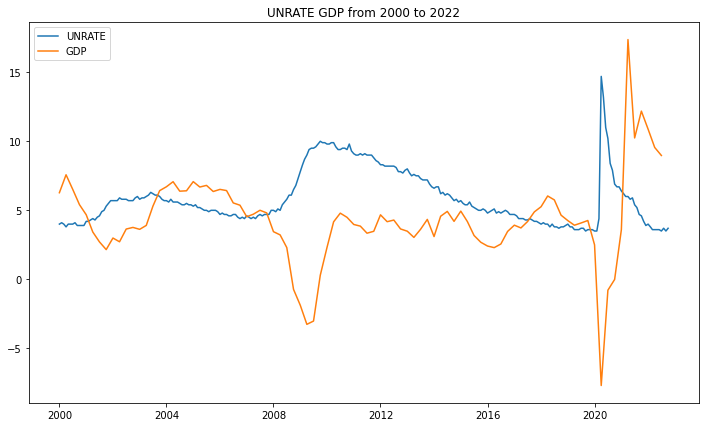

In [ ]:
# Visualization


plt.figure(figsize = (12,7))
plt.plot(df['date'], df[name], label = name)
plt.plot(df2['date'], df2[seriesID], label = seriesID)
plt.legend()
plt.title(name + ' ' + seriesID + ' from ' + year_start + ' to ' + year_end)

plt.show()


